<a href="https://colab.research.google.com/github/mkkadyrowa/Python_MedicareData/blob/main/MedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv'
                 )  # relative filename or I can put absolute file path

print("Prints the row x column information: \n", df.shape)  # provides the size of data file

print("Prints the initial rows in the data \n", df.head())  # provides with the first 5 entries of data

print("Prints the entry from Average Submitted Charge column: ", df['Avg_Sbmtd_Chrg'][2666])  # prints that column and specific entry

print("Prints the matched rows: \n", df.loc[df.HCPCS_Desc == 'Suture of ruptured muscle of thigh'])  # label based selection which selects the data that matches the index value "Suture of ruptured muscle of thigh" in the columns HCPCS_Desc



Prints the row x column information: 
 (39884, 15)
Prints the initial rows in the data 
   Rndrng_Prvdr_Geo_Lvl  Rndrng_Prvdr_Geo_Cd Rndrng_Prvdr_Geo_Desc HCPCS_Cd  \
0             National                  NaN              National    0001A   
1             National                  NaN              National    0001A   
2             National                  NaN              National    0002A   
3             National                  NaN              National    0003M   
4             National                  NaN              National    0005U   

                                          HCPCS_Desc HCPCS_Drug_Ind  \
0                       Adm sarscov2 30mcg/0.3ml 1st              N   
1                       Adm sarscov2 30mcg/0.3ml 1st              N   
2                       Adm sarscov2 30mcg/0.3ml 2nd              N   
3                         Liver dis 10 assays w/nash              N   
4  Test for detecting genes associated with prost...              N   

  Place_Of_Srvc

In [ ]:
# Get the entries with cancer related procedures and the resulting charge

substring = 'cancer'
cancer = df[df.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
print(cancer['HCPCS_Desc'], cancer['Avg_Sbmtd_Chrg'])

print(df.describe())  # provides some numerical data related to each column

print(df['Avg_Sbmtd_Chrg'].describe()
      )  # provides numerical data related to average medicare payment amount

print(df['Avg_Sbmtd_Chrg'].value_counts())  # to obtain unique value pairs 



4         Test for detecting genes associated with prost...
185       Analysis of galectin-3-binding protein and sca...
269       Computer-assisted digital imaging of esophagus...
5960      Bladder instillation of cancer preventive, inh...
5961      Bladder instillation of cancer preventive, inh...
                                ...                        
267136    Colorectal cancer screening; colonoscopy on in...
267137    Colorectal cancer screening; colonoscopy on in...
268136    Cervical or vaginal cancer screening; pelvic a...
268137    Colorectal cancer screening; colonoscopy on in...
268138    Counseling visit to discuss need for lung canc...
Name: HCPCS_Desc, Length: 1199, dtype: object 4          795.000000
185       3520.000000
269       2993.264151
5960       382.325855
5961       338.027506
             ...     
267136    1284.000000
267137    1284.000000
268136     113.636364
268137     720.836667
268138     100.428571
Name: Avg_Sbmtd_Chrg, Length: 1199, dtype: float64
 

In [ ]:
print('*** Provides the mean of the numeric columns: \n', df.mean(numeric_only=True), '\n\n\n')

print('*** Provides the standard deviation of the numeric columns: \n', df.std(numeric_only=True), '\n\n\n')

print('*** Provides the skewness of the numeric columns: \n', df.skew(numeric_only=True), '\n\n\n')

print('*** Unique values of specific column: \n', df[ 'Avg_Mdcr_Pymt_Amt'].unique(), '\n\n\n') # removes duplicates and provides unique, non duplicate data

# Info on the data
print("*** Prints the information regarding the data: \n", df.info())  # tells us which column contains numerical or non-numerical data

*** Provides the mean of the numeric columns: 
 Tot_Rndrng_Prvdrs       265.080384
Tot_Benes              5102.846846
Tot_Srvcs             22179.598136
Tot_Bene_Day_Srvcs     9813.788744
Avg_Sbmtd_Chrg         1252.792807
Avg_Mdcr_Alowd_Amt      294.650498
Avg_Mdcr_Pymt_Amt       234.689134
Avg_Mdcr_Stdzd_Amt      231.083286
dtype: float64 



*** Provides the standard deviation of the numeric columns: 
 Tot_Rndrng_Prvdrs       3217.362460
Tot_Benes             109313.366215
Tot_Srvcs             598187.311574
Tot_Bene_Day_Srvcs    293560.604706
Avg_Sbmtd_Chrg          2377.146038
Avg_Mdcr_Alowd_Amt       769.097482
Avg_Mdcr_Pymt_Amt        615.856306
Avg_Mdcr_Stdzd_Amt       609.502225
dtype: float64 



*** Provides the skewness of the numeric columns: 
 Tot_Rndrng_Prvdrs      82.025257
Tot_Benes             109.245524
Tot_Srvcs             103.579781
Tot_Bene_Day_Srvcs    169.117067
Avg_Sbmtd_Chrg          8.711190
Avg_Mdcr_Alowd_Amt     30.406920
Avg_Mdcr_Pymt_Amt      30.230228
A

In [ ]:

# Obtaining crosstabs
tab = pd.crosstab( index = df['Avg_Sbmtd_Chrg'], columns = df[ 'Avg_Mdcr_Pymt_Amt' ],)
print('This is the crosstab between submitted charge and average payment:\n', tab)
# above did not work when tried to obtain cross tab; look up the crosstab function of pandas and see why it is breaking


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


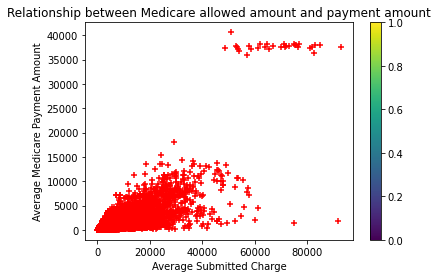

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')


# Visualizing some data
plt.scatter( df['Avg_Sbmtd_Chrg'], df[ 'Avg_Mdcr_Pymt_Amt'], marker='+', c='red' )
plt.title('Relationship between Medicare allowed amount and payment amount')
plt.xlabel('Average Submitted Charge')
plt.ylabel('Average Medicare Payment Amount')
plt.colorbar()
plt.show()

# find the values for the values in the right side of the plot; average submitted charge > 60,000

Scatter plots are widely used to represent relation among variables and how change in one affects the other. 

*** Prints description: 
 count    268149.000000
mean       1252.792807
std        2377.146038
min           0.001320
25%         125.931769
50%         429.062275
75%        1551.450000
max       92910.466667
Name: Avg_Sbmtd_Chrg, dtype: float64 



*** Prints median: 
 429.06227528 



*** Prints mean: 
 1252.7928072515942 



*** Plots the Average Submitted Charge column *** 



/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

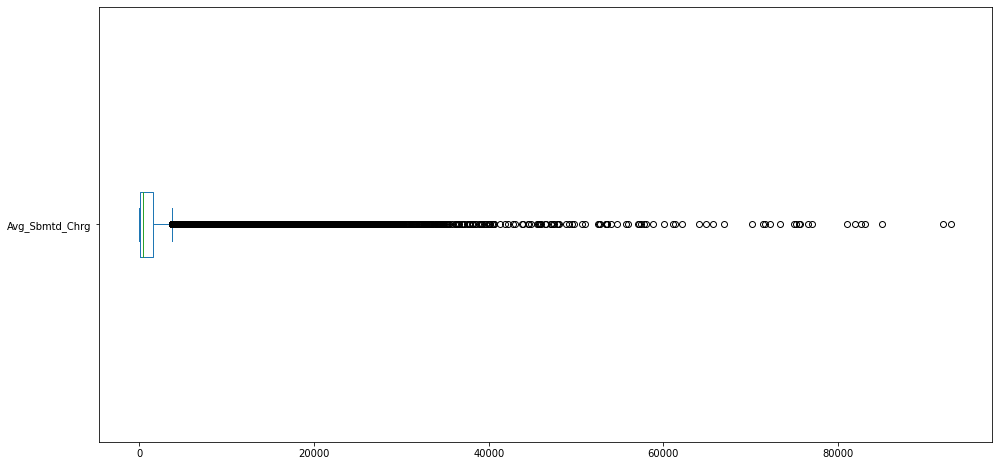

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')

# Analyze Average Submitted Charge column [Avg_Sbmtd_Chrg]

print('*** Prints description: \n',df['Avg_Sbmtd_Chrg'].describe(), '\n\n\n')

print('*** Prints median: \n',df['Avg_Sbmtd_Chrg'].median(),'\n\n\n')

print('*** Prints mean: \n',df['Avg_Sbmtd_Chrg'].mean(), '\n\n\n')

print('*** Plots the Average Submitted Charge column *** \n')

df['Avg_Sbmtd_Chrg'].plot(kind='box', vert=False, figsize=(16,8))

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


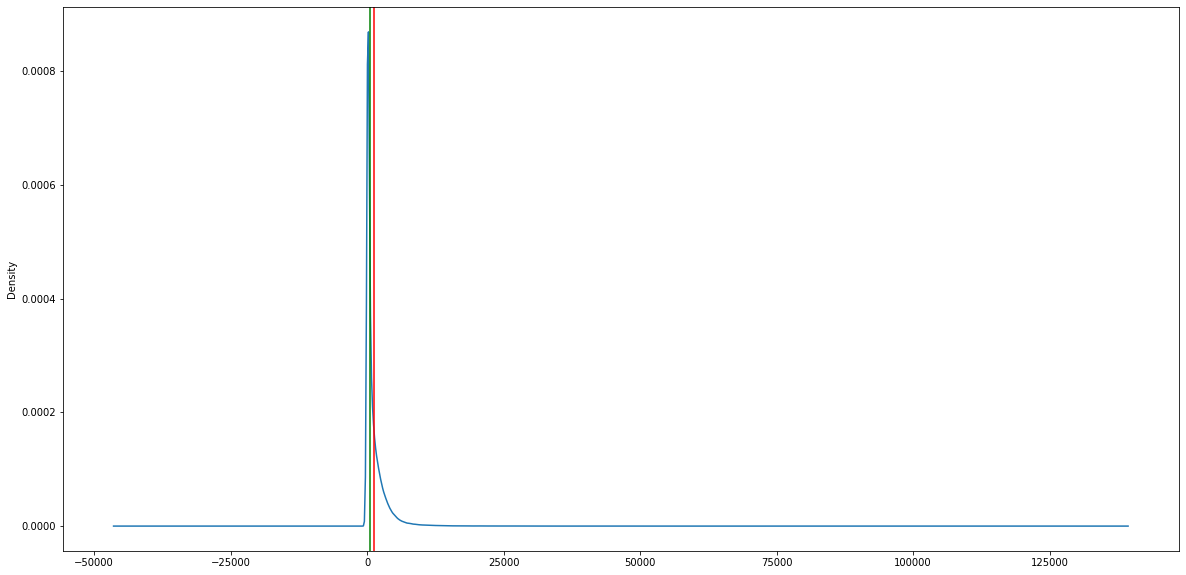

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')

# Analyze Average Submitted Charge column [Avg_Sbmtd_Chrg]

kde = df['Avg_Sbmtd_Chrg'].plot(kind='density', figsize=(20, 10))
kde.axvline(df['Avg_Sbmtd_Chrg'].mean(), color='red')
kde.axvline(df['Avg_Sbmtd_Chrg'].median(), color='green')

Density Plot is a type of data visualization tool. It is a variation of the histogram that uses ‘kernel smoothing’ while plotting the values. It is a continuous and smooth version of a histogram inferred from a data.

Density plots uses Kernel Density Estimation (so they are also known as Kernel density estimation plots or KDE) which is a probability density function. The region of plot with a higher peak is the region with maximum data points residing between those values.

<ipython-input-5-977d598c7cb6>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')


(0.0, 7500.0)

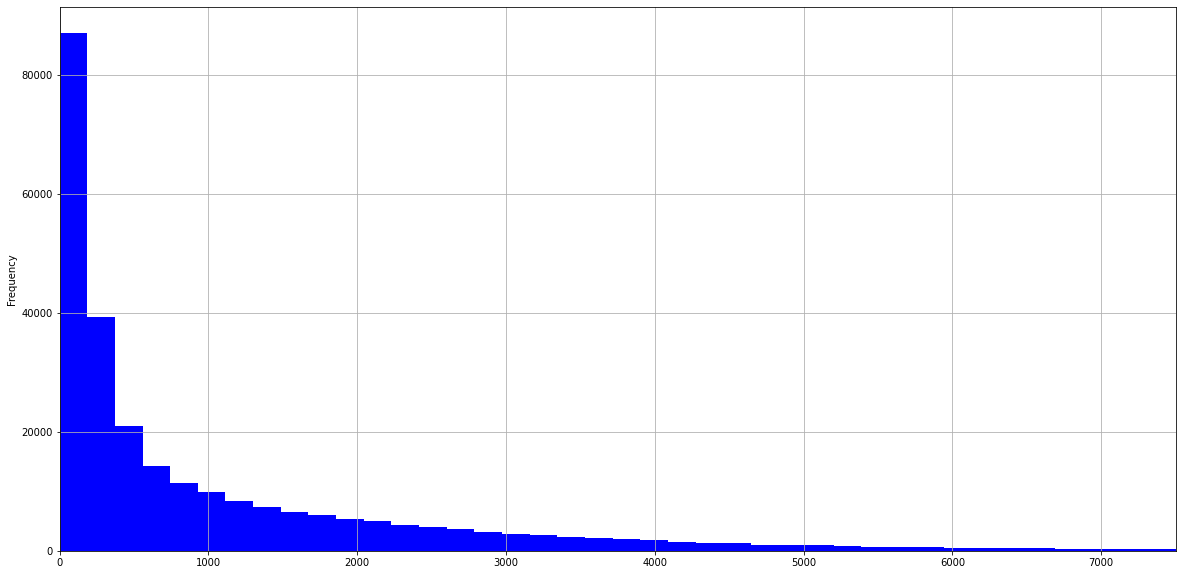

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')

# Analyze Average Submitted Charge column [Avg_Sbmtd_Chrg]

histog = df['Avg_Sbmtd_Chrg'].plot(kind='hist', figsize=(20,10), color='blue', bins=500, grid=True)
histog.set_xlim(0,7500)

# paredo distribution

A histogram is a graph showing frequency distributions.

It is a graph showing the number of observations within each given interval.

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

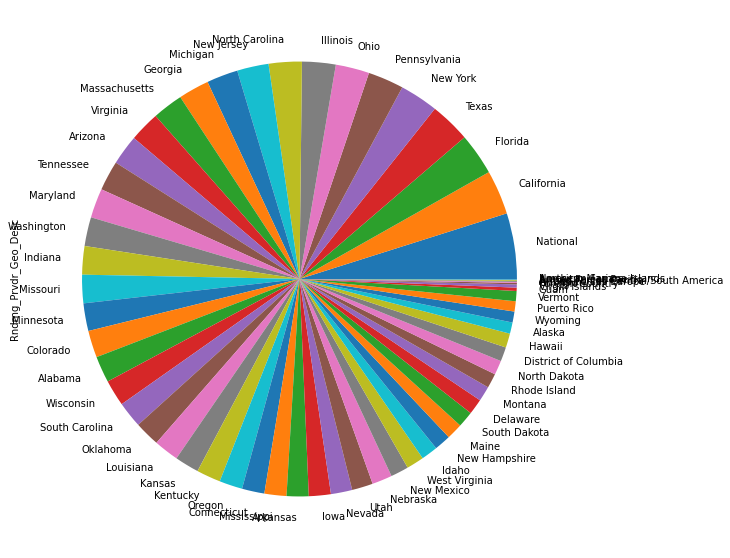

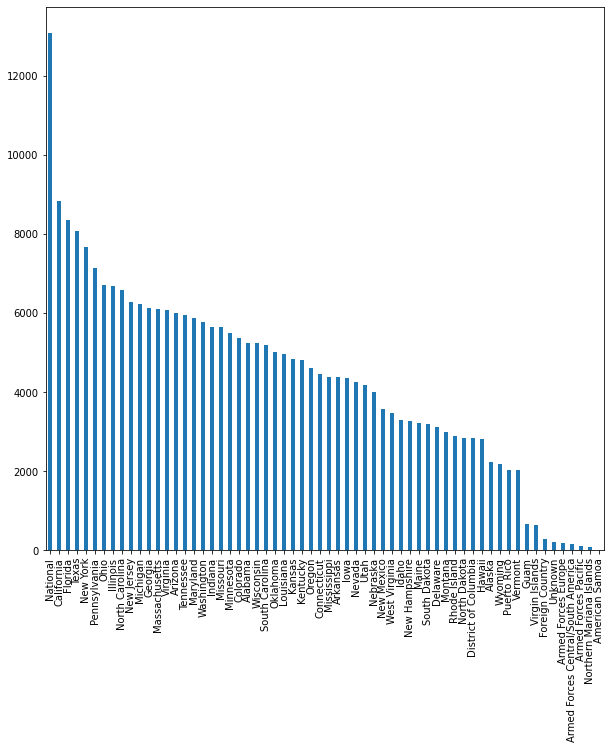

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('MUP_PHY_R22_P05_V10_D20_Geo.csv')

# Analyze Rendering Provider Geological Desription column [ARndrng_Prvdr_Geo_Desc]

df['Rndrng_Prvdr_Geo_Desc'].value_counts().plot(kind='pie', figsize=(10,10))

plt.figure()

df['Rndrng_Prvdr_Geo_Desc'].value_counts().plot(kind='bar', figsize=(10,10))


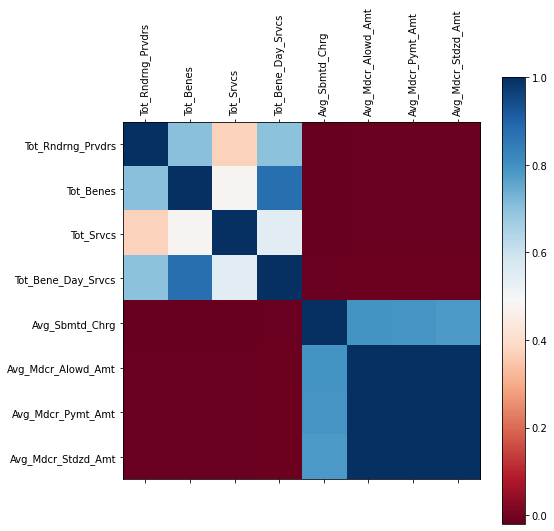

In [ ]:
# Finding correlation and plotting the colormap
correl = df.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(correl, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(correl.columns)), correl.columns, rotation='vertical')
plt.yticks(range(len(correl.columns)), correl.columns)
plt.colorbar()


For the above correlation matrix, analyze the relationship that exists between various variables.

1. 